In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

In [72]:
import kagglehub


path = kagglehub.dataset_download("nikhilkumar19980628/wipro-hr-attrition")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\anike\.cache\kagglehub\datasets\nikhilkumar19980628\wipro-hr-attrition\versions\1


In [73]:
df = pd.read_csv('Wipro HR Attrition Analysis.csv')

In [91]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [ ]:

print(df.info())

print(df.head())

Dataset Shape: (1480, 38)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                

In [75]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears     

In [76]:
print("\nAttrition Distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition Percentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)


Attrition Distribution:
Attrition
No     1242
Yes     238
Name: count, dtype: int64

Attrition Percentage:
Attrition
No     83.918919
Yes    16.081081
Name: proportion, dtype: float64


In [77]:
df_processed = df.copy()

In [78]:
df_processed

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [80]:
mean_value = df_processed['YearsWithCurrManager'].mean()
df_processed['YearsWithCurrManager'].fillna(mean_value, inplace=True)

C:\Users\anike\AppData\Local\Temp\ipykernel_26520\1930812184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['YearsWithCurrManager'].fillna(mean_value, inplace=True)


In [81]:
df_processed.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [57]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']


In [58]:
label_encoder = LabelEncoder()
binary_cols = ['Attrition', 'Gender', 'OverTime']

In [59]:
for col in binary_cols:
    if col in df_processed.columns:
        df_processed[col] = label_encoder.fit_transform(df_processed[col])

In [60]:
multi_class_cols = [col for col in categorical_cols if col not in binary_cols]
df_processed = pd.get_dummies(df_processed, columns=multi_class_cols, drop_first=True)

In [61]:
print("\nProcessed Dataset Shape:", df_processed.shape)


Processed Dataset Shape: (1480, 1525)


In [62]:
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

In [63]:
def plot_categorical_vs_attrition(data, feature, target='Attrition'):
    plt.figure(figsize=(10, 6))
    
    # Calculate percentages
    crosstab = pd.crosstab(data[feature], data[target], normalize='index') * 100
    
    # Create subplot
    plt.subplot(1, 2, 1)
    data[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs Attrition Rate')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(['No Attrition', 'Attrition'])
    
    plt.tight_layout()
    plt.savefig(f'visualizations/{feature}_analysis.png')
    plt.show()

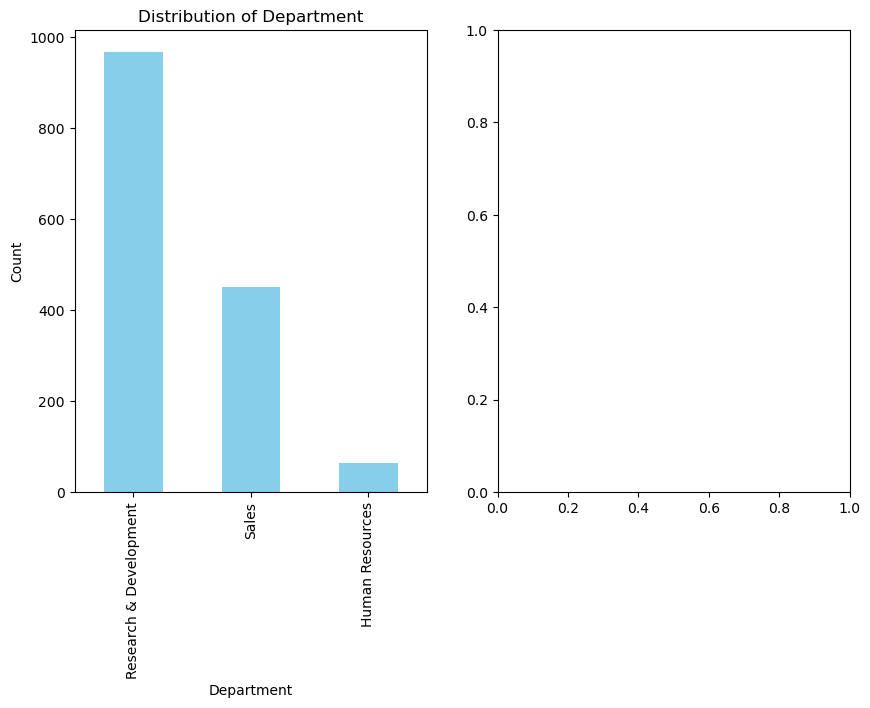

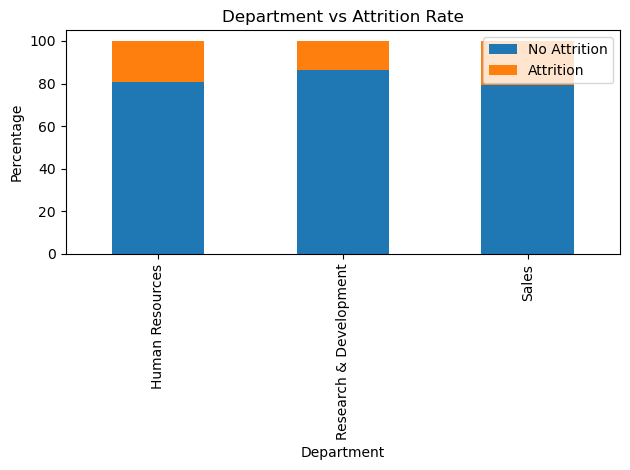

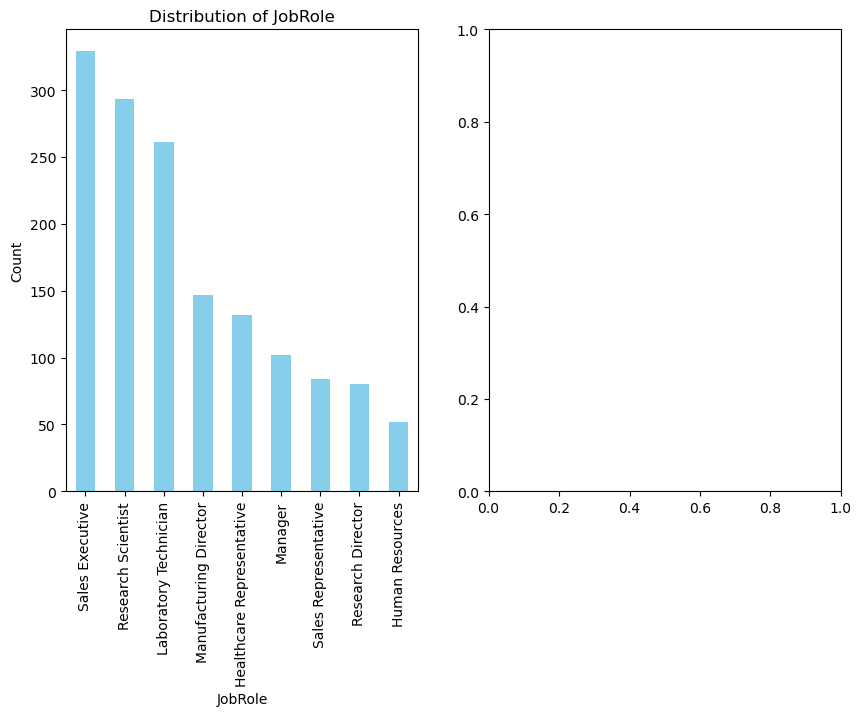

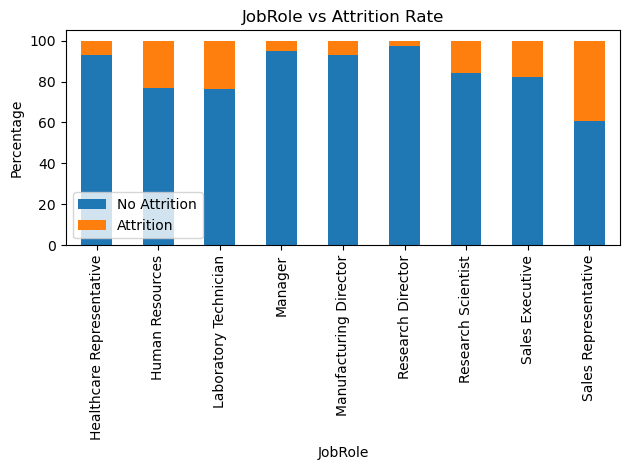

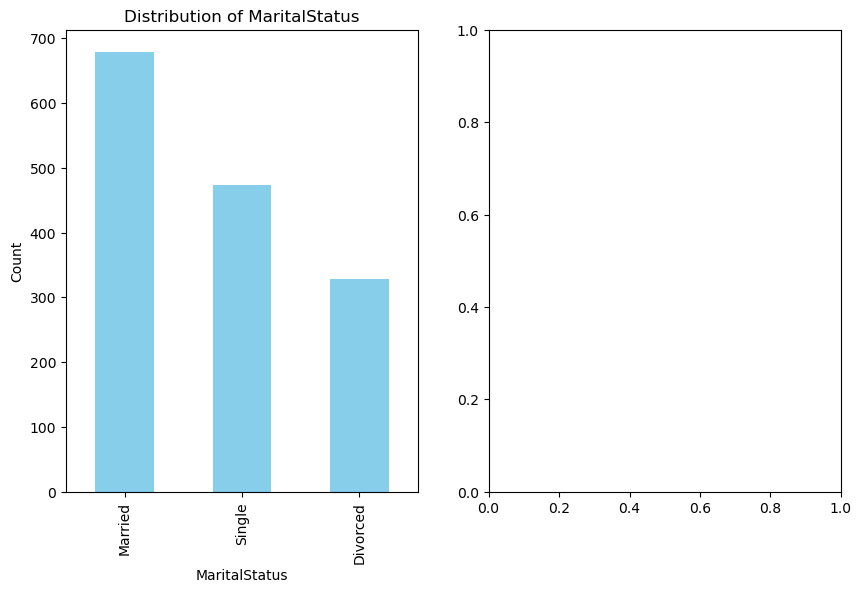

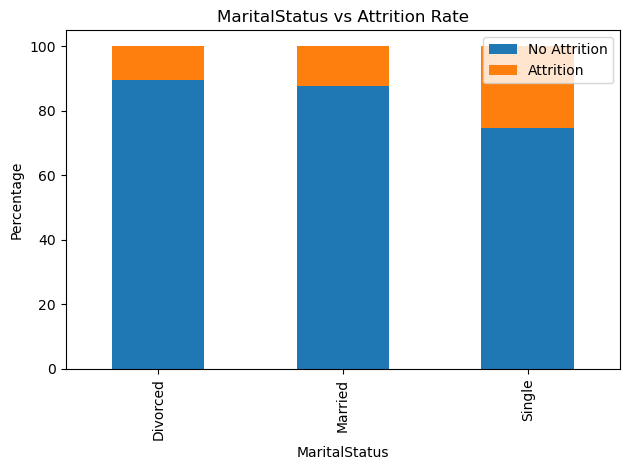

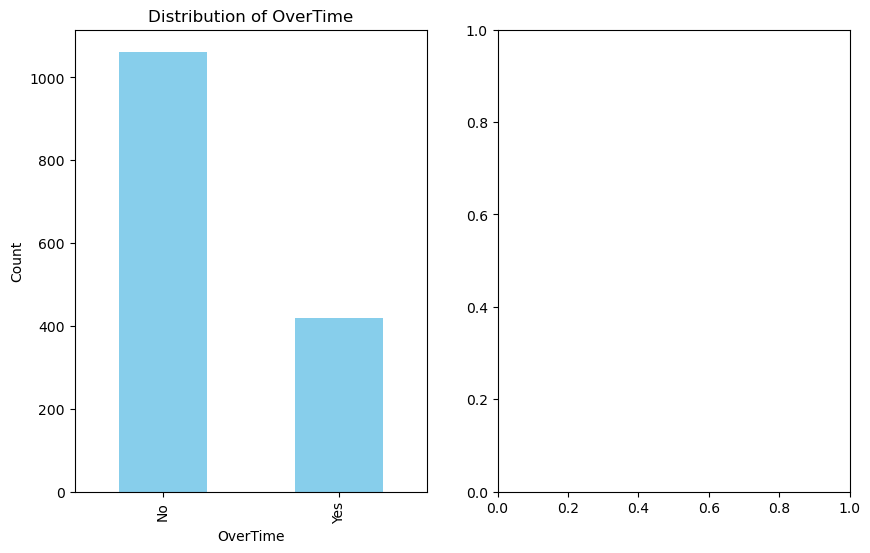

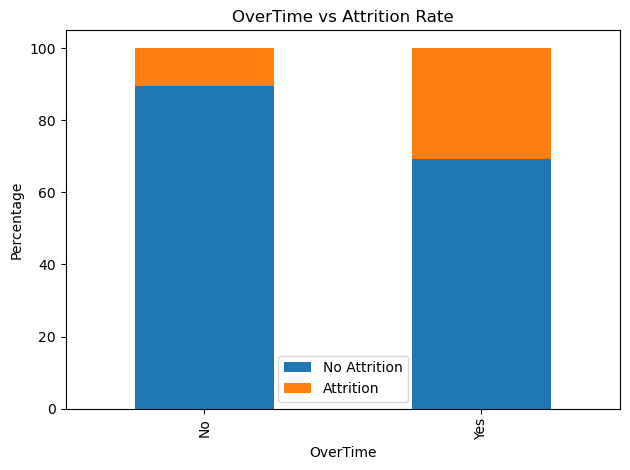

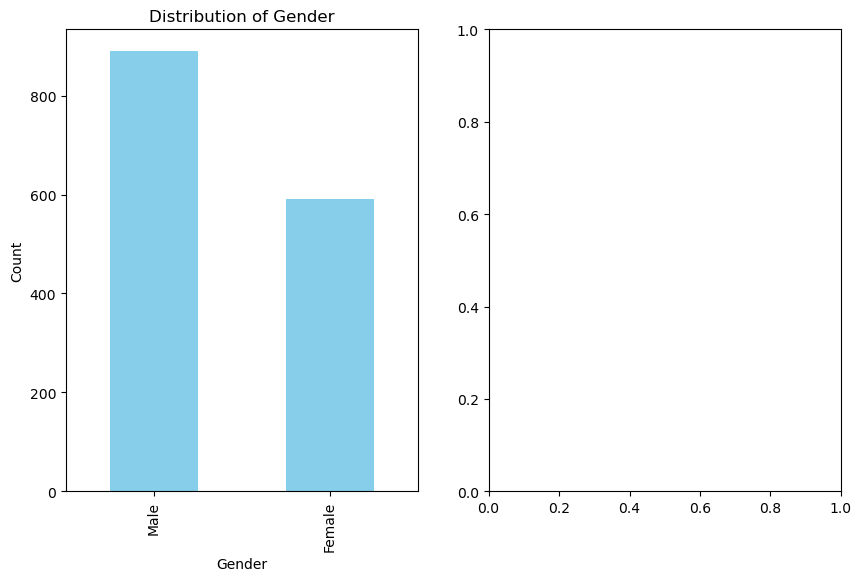

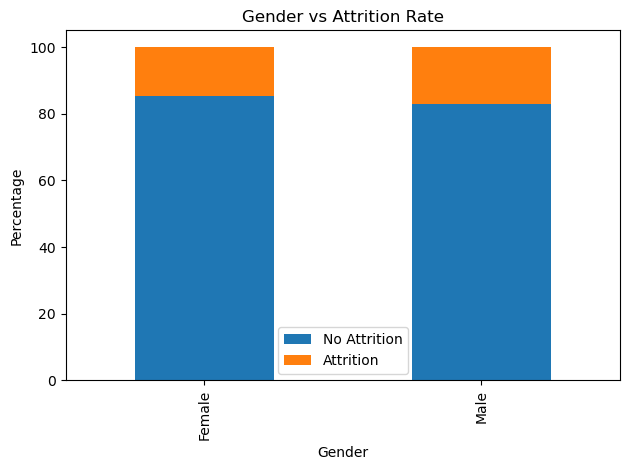

In [64]:
important_features = ['Department', 'JobRole', 'MaritalStatus', 'OverTime', 'Gender']
for feature in important_features:
    if feature in df.columns:
        plot_categorical_vs_attrition(df, feature)

In [65]:
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1184, 1524)
Test set size: (296, 1524)


In [68]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}


Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.8378
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.8747


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


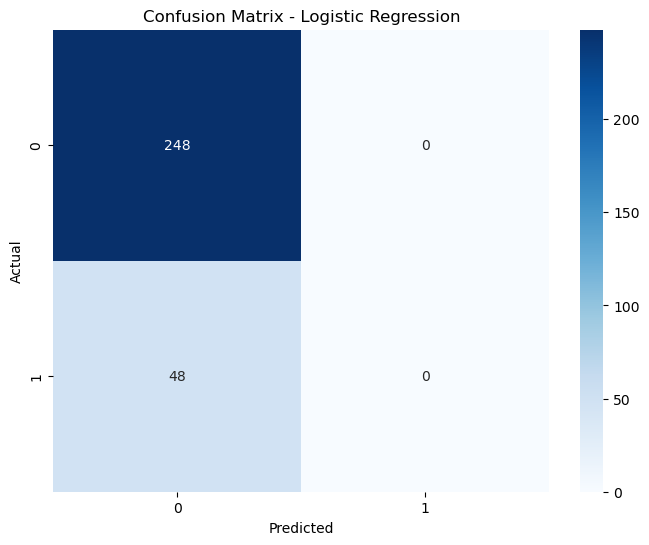

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       248
           1       0.00      0.00      0.00        48

    accuracy                           0.84       296
   macro avg       0.42      0.50      0.46       296
weighted avg       0.70      0.84      0.76       296


Training Random Forest...

Random Forest Performance:
Accuracy: 0.8514
Precision: 1.0000
Recall: 0.0833
F1-Score: 0.1538
ROC-AUC: 0.8208


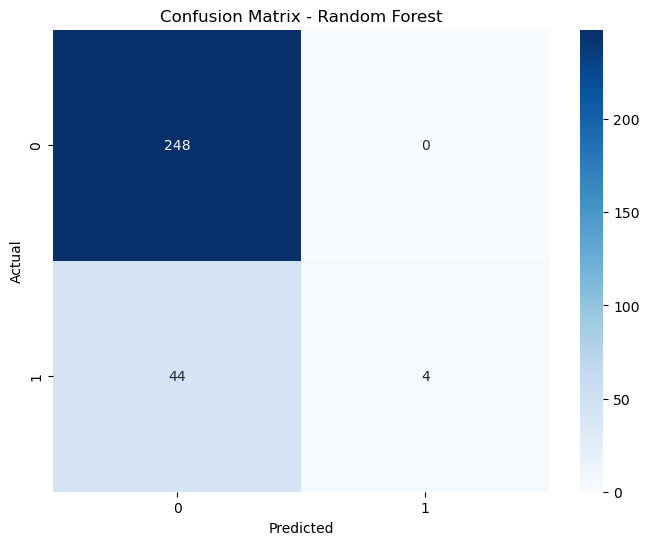


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       248
           1       1.00      0.08      0.15        48

    accuracy                           0.85       296
   macro avg       0.92      0.54      0.54       296
weighted avg       0.87      0.85      0.79       296


Training XGBoost...

XGBoost Performance:
Accuracy: 0.8750
Precision: 0.7619
Recall: 0.3333
F1-Score: 0.4638
ROC-AUC: 0.8379


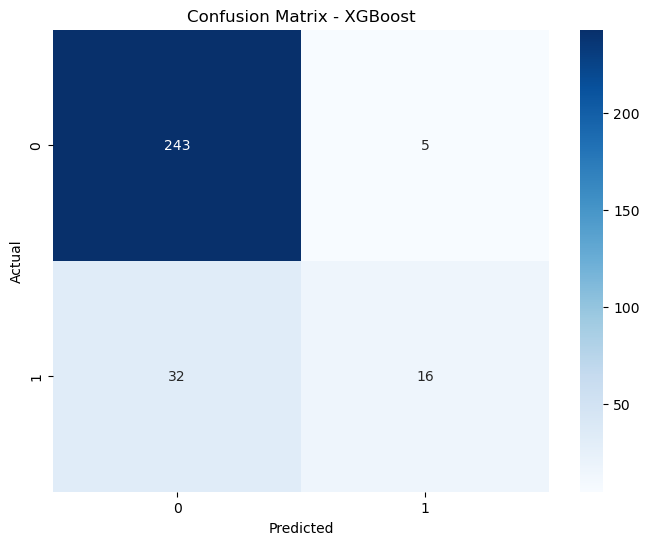


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       248
           1       0.76      0.33      0.46        48

    accuracy                           0.88       296
   macro avg       0.82      0.66      0.70       296
weighted avg       0.86      0.88      0.85       296



In [69]:
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'model': model
    }
    
    # Print metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'visualizations/confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()
    
    # Classification Report
    print(f"\nClassification Report - {name}:")
    print(classification_report(y_test, y_pred))


MODEL COMPARISON
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8378     0.0000  0.0000    0.0000   0.8747
Random Forest          0.8514     1.0000  0.0833    0.1538   0.8208
XGBoost                0.8750     0.7619  0.3333    0.4638   0.8379


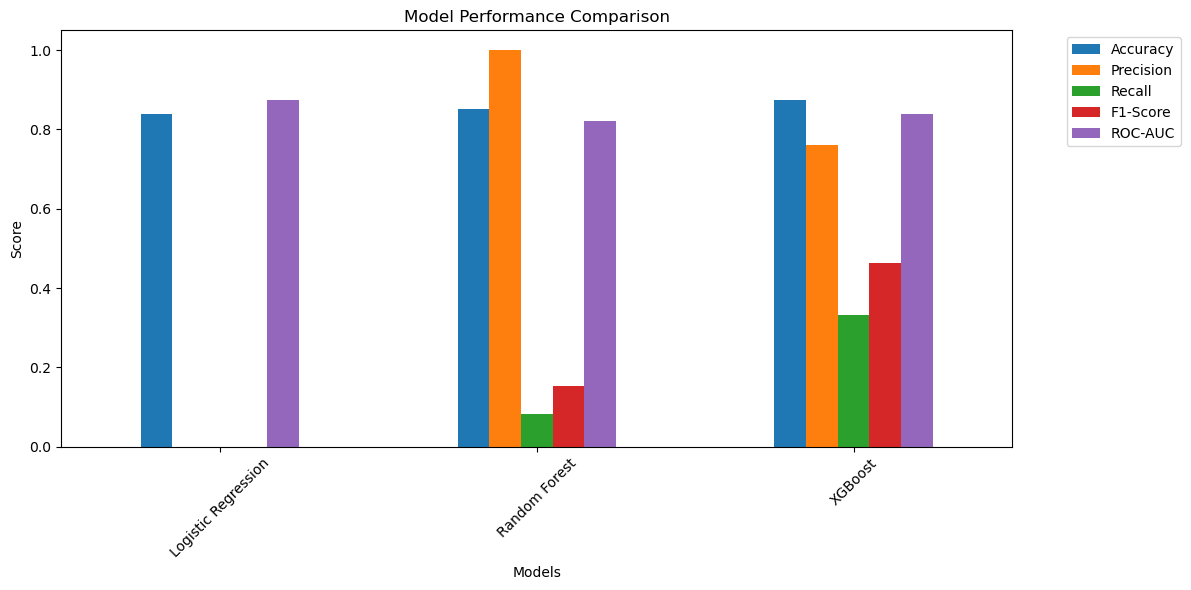

In [82]:
comparison_df = pd.DataFrame({
    name: {
        'Accuracy': results[name]['accuracy'],
        'Precision': results[name]['precision'],
        'Recall': results[name]['recall'],
        'F1-Score': results[name]['f1_score'],
        'ROC-AUC': results[name]['roc_auc']
    }
    for name in models.keys()
}).T

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(comparison_df.round(4))

# Visualize model comparison
comparison_df.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('visualizations/model_comparison.png')
plt.show()


In [83]:
feature_importance_rf = results['Random Forest']['model'].feature_importances_
feature_importance_xgb = results['XGBoost']['model'].feature_importances_

In [84]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': feature_importance_rf,
    'XGB_Importance': feature_importance_xgb
})


In [85]:
feature_importance_df['Avg_Importance'] = (feature_importance_df['RF_Importance'] + 
                                          feature_importance_df['XGB_Importance']) / 2
feature_importance_df = feature_importance_df.sort_values('Avg_Importance', ascending=False)

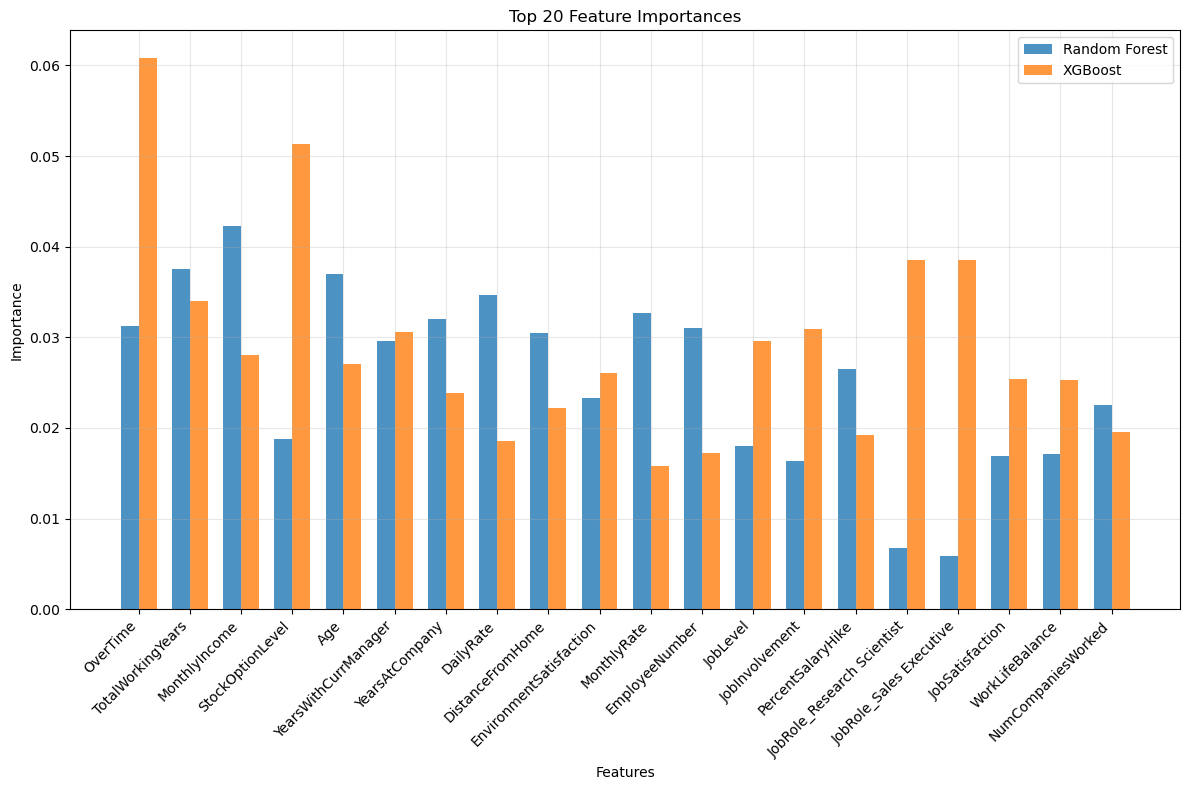

In [90]:
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(20)
x = np.arange(len(top_features))
width = 0.35

plt.bar(x - width/2, top_features['RF_Importance'], width, label='Random Forest', alpha=0.8)
plt.bar(x + width/2, top_features['XGB_Importance'], width, label='XGBoost', alpha=0.8)




plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances')
plt.xticks(x, top_features['Feature'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/feature_importance_comparison.png')
plt.show()

